Import Relevant Libraries

In [44]:
#Import Packages
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

Data Exploration

In [46]:
#Read Data of our generated csv file
data = pd.read_csv('C:/Users/j3ff/Coding Projects/GambleAware/testplayer.csv')

In [47]:
#Check head
data.head()

,User Id,Time,Win/Loss Ratio,Number of Deposits,label
0,1,1,0.860352,1,0
1,2,6,0.352193,8,4
2,3,12,0.506405,2,4
3,4,0,0.910978,1,0
4,5,2,0.009228,11,4


In [48]:
data.tail()

,User Id,Time,Win/Loss Ratio,Number of Deposits,label
4995,4996,9,0.332550,5,3
4996,4997,10,1.298775,5,2
4997,4998,15,0.008806,20,5
4998,4999,10,0.716087,5,2
4999,5000,1,1.061353,1,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User Id             5000 non-null   int64  
 1   Time                5000 non-null   int64  
 2   Win/Loss Ratio      5000 non-null   float64
 3   Number of Deposits  5000 non-null   int64  
 4   label               5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [51]:
#Check number of players in each gamber category in our dataset
data['label'].value_counts()

3    1066
4    1017
2     957
0     754
5     666
1     540
Name: label, dtype: int64

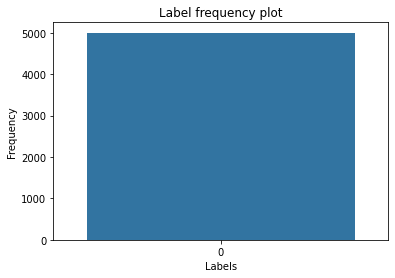

In [54]:
sns.countplot(data['label'])
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Label frequency plot')
plt.show()

Build model

In [55]:
#Separate dependent and independent variables
X = data.drop(['User Id','label'], axis = 1)
Y = data['label']

In [56]:
#Split data into training data and testing data

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [57]:
#Check shape of training and testing data
'Train Shape', X_train.shape, y_train.shape

('Train Shape', (4000, 3), (4000,))

In [58]:
'Test Shape', X_test.shape, y_test.shape

('Test Shape', (1000, 3), (1000,))

Building our Decision Tree

In [59]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
#Prediction for training and testing set
tr_predict = model.predict(X_train)
ts_predict = model.predict(X_test)

In [61]:
#Check accuracy for both training and testing data
'Training Accuracy: ', accuracy_score(y_train,tr_predict)

('Training Accuracy: ', 0.99825)

In [69]:
testingAccuracy = accuracy_score(y_test,ts_predict)

In [70]:
precisionAccuracy = precision_score(y_test,ts_predict, average ='micro')

In [71]:
recallAccuracy =  recall_score(y_test,ts_predict, average ='micro')

In [72]:
fscore = f1_score(y_test,ts_predict, average ='micro')

In [74]:
print('Testing Accuracy: ',testingAccuracy)
print('Precision Accuracy: ',precisionAccuracy)
print('Recall Accuracy: ',recallAccuracy)
print('F- Measure: ',fscore)

Testing Accuracy:  0.82
Precision Accuracy:  0.82
Recall Accuracy:  0.82
F- Measure:  0.82


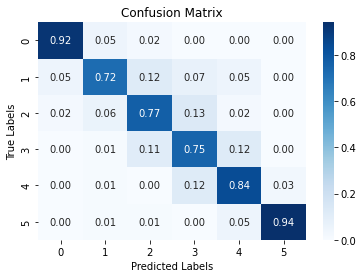

In [66]:
# Generate confusion matrix
cm = confusion_matrix(y_test,ts_predict)
labels = ['True Neg','False Pos','False Neg','True Pos']

cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.savefig('Confusion Matrix')
plt.show()

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20), dpi=1000)
plot_tree(model, filled = True, feature_names = X.columns)
plt.savefig('Gamblers-Decision-Tree')
plt.show()

In [67]:
# show importance of features in building tree
df_importance = pd.DataFrame({'Features' : X.columns, 'Importance': model.feature_importances_})
df_importance
#The data shows that the most important feature that is considered is
#the win/loss rate, then time spent gambling
#which makes sense, right?

,Features,Importance
0,Time,0.379684
1,Win/Loss Ratio,0.421205
2,Number of Deposits,0.199112


In [68]:
#This block of code saves the model as a pickle file and downloads it
import pickle
with open('gambler_classify.pickle', 'wb') as f:
  pickle.dump(model,f)